Yeray Hernández Bethencourt

# Yeray Hernández
# Unsupervised Model
This dataset has been modify in the last notebook. We are going to repeat the more important steps with the original dataset and also trying new ways for resolving the problem.

Let's start preparing our model with unsupervised learning techniques. This means we'll input the data, and the model will search for patterns wherever it finds them.

Once finished, we'll compare the results obtained to reach a better conclusion.

We are going to implement a K-Means clustering model, wich is commonly usedf for unsupervised machine learning tasks.

First of all we are going to scall the features to ensure that the clustering algorithm isn't biased byt scale of the data. Then we are going to set up the K-Means clustering model with three clusters. Finally plot the results.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

df_cardiovascular = pd.read_csv('Cardiovascular_Disease_Dataset.csv')

# Data cleaning and preparation

In [2]:
ran_st = 30 # random state for reproducibility
X = df_cardiovascular.drop(columns=['target', 'patientid']).copy()
df_cardoiovascular_target = df_cardiovascular['target']
cat_columns = df_cardiovascular.select_dtypes(['category']).columns
X[cat_columns] = X[cat_columns].apply(lambda x: x.cat.codes)

## Equalizing the number of samples per gender

In [3]:
num_mujeres = df_cardiovascular[df_cardiovascular['gender'] == 0].shape[0]
print(num_mujeres)

235


In [4]:
# Separar datos por género
X_hombres = X[df_cardiovascular['gender'] == 1]
X_mujeres = X[df_cardiovascular['gender'] == 0]

# Seleccionar una muestra aleatoria de 250 hombres y mujeres
X_hombres_sample = X_hombres.sample(n=250, random_state=ran_st)
X_mujeres_sample = X_mujeres.sample(n=235)

# Concatenar los conjuntos de datos seleccionados
X_balanced = pd.concat([X_hombres_sample, X_mujeres_sample])

# Clustering

Calculating the cluster

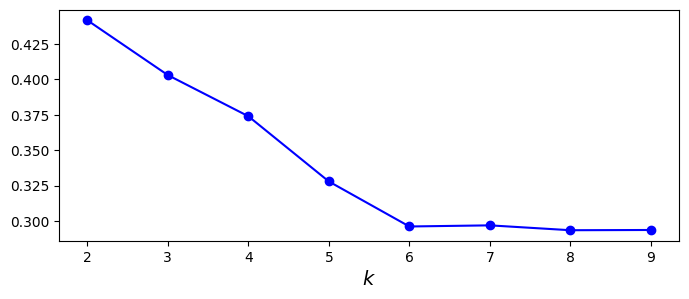

In [5]:
max_k=10
kmeans_per_k = [KMeans(n_clusters=k, random_state=ran_st).fit(X) for k in range(1, max_k)]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, max_k), silhouette_scores, "bo-")

plt.xlabel("$k$", fontsize=14)

plt.show()

As we can see in the last plot, we have around 0.45 separating in two clusters what means that data structure is not that bad but is not the best one.
Lets try withh "Elbow Method" for taking more information and validate.

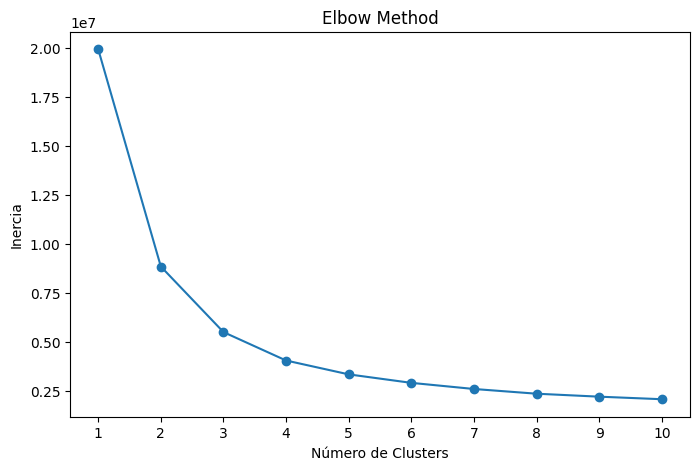

In [6]:
# List to store the inertia values.
inertia = []

# Maximum number of clusters you want to test.
max_clusters = 10

# Iterate over the number of clusters from 1 to max_clusters.
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=ran_st)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_clusters + 1), inertia, marker='o', linestyle='-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Elbow Method')
plt.xticks(range(1, max_clusters + 1))
plt.show()

Lets compare 2 and 3 clusters.

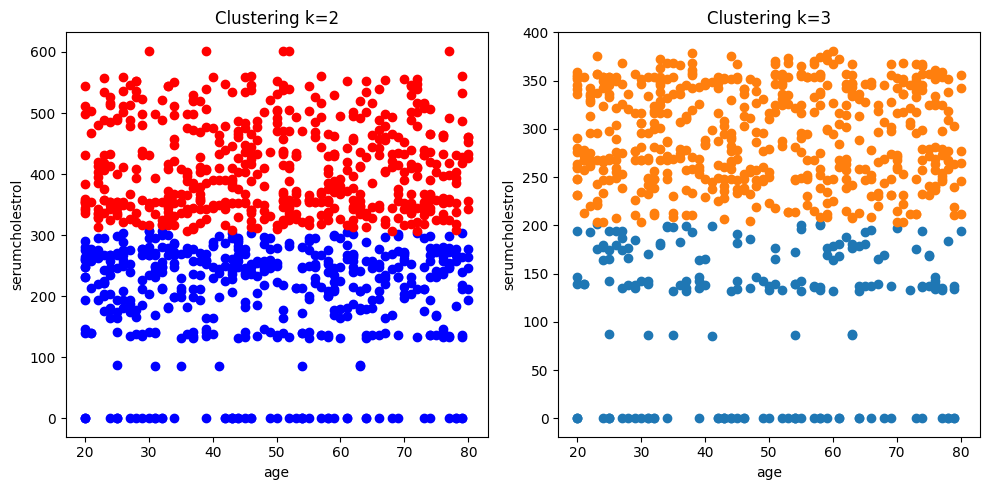

In [7]:
kmeans2 = KMeans(n_clusters=2, random_state=ran_st)
label2 = kmeans2.fit_predict(X)
kmeans3 = KMeans(n_clusters=3, random_state=ran_st)
label3 = kmeans3.fit_predict(X)

# filter rows of original data
filtered_label0_2 = X[label2 == 0]
filtered_label1_2 = X[label2 == 1]

filtered_label0_3 = X[label3 == 0]
filtered_label1_3 = X[label3 == 1]

x_lab = "age"
y_lab = "serumcholestrol"

# Plotting results for k=2
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # Subplot para la primera tabla
plt.scatter(filtered_label0_2[x_lab], filtered_label0_2[y_lab], color='blue')
plt.scatter(filtered_label1_2[x_lab], filtered_label1_2[y_lab], color='red')
plt.xlabel(x_lab)
plt.ylabel(y_lab)
plt.title("Clustering k=2")

# Plotting results for k=3
plt.subplot(1, 2, 2)  # Subplot para la segunda tabla
plt.scatter(filtered_label0_3[x_lab], filtered_label0_3[y_lab])
plt.scatter(filtered_label1_3[x_lab], filtered_label1_3[y_lab])
plt.xlabel(x_lab)
plt.ylabel(y_lab)
plt.title("Clustering k=3")

plt.tight_layout()
plt.show()


In [8]:
# Evaluating clusters
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

# Calculate homogeneity, completeness, and V-measure score with k=2
homogeneity = homogeneity_score(df_cardiovascular['target'], label2)
completeness = completeness_score(df_cardiovascular['target'], label2)
v_measure = v_measure_score(df_cardiovascular['target'], label2)

print("K=2")
print("Homogeneidad:", homogeneity)
print("Completitud:", completeness)
print("Puntuación V:", v_measure)

# Calculate homogeneity, completeness, and V-measure score with k=3
homogeneity = homogeneity_score(df_cardiovascular['target'], label3)
completeness = completeness_score(df_cardiovascular['target'], label3)
v_measure = v_measure_score(df_cardiovascular['target'], label3)

print("K=3")
print("Homogeneidad:", homogeneity)
print("Completitud:", completeness)
print("Puntuación V:", v_measure)



K=2
Homogeneidad: 0.021933876063747363
Completitud: 0.02156599576086512
Puntuación V: 0.021748380322466867
K=3
Homogeneidad: 0.09682757329429767
Completitud: 0.06533375173647986
Puntuación V: 0.07802240927243019


This results looks strange. Having that bad results, we are going to use DBSCAN algorithm because no requiere que los datos estén normalizados y puede manejar eficazmente conjuntos de datos con diferentes escalas y densidades.

In [9]:
# Parameters
epsilon = 0.5  # Maximum distance between two samples to be considered neighbors
minPts = 5     # Minimum number of samples in a neighborhood to form a cluster

dbscan = DBSCAN(eps=epsilon, min_samples=minPts)

labels = dbscan.fit_predict(X)

# Calculate homogeneity, completeness, and V-measure score.
homogeneity = metrics.homogeneity_score(df_cardiovascular['target'], labels)
completeness = metrics.completeness_score(df_cardiovascular['target'], labels)
v_measure = metrics.v_measure_score(df_cardiovascular['target'], labels)

print("Homogeneidad:", homogeneity)
print("Completitud:", completeness)
print("Puntuación V:", v_measure)



Homogeneidad: 0.0
Completitud: 1.0
Puntuación V: 0.0


A result with homogeneity and V-score both equal to 0.0 and completeness equal to 1.0 indicates that the clustering fails to capture the true structure of the data and simply separates samples by classes, but not by intrinsic similarity between the samples.

Lets modify the data for trying to have better results.

# Clustering modifyed with equal gender

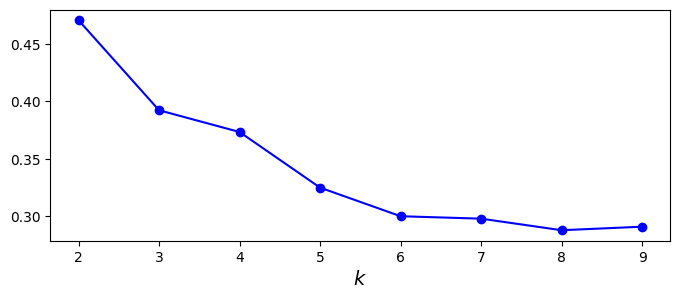

In [10]:
max_k=10
kmeans_per_k = [KMeans(n_clusters=k, random_state=ran_st).fit(X_balanced) for k in range(1, max_k)]
silhouette_scores = [silhouette_score(X_balanced, model.labels_) for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, max_k), silhouette_scores, "bo-")

plt.xlabel("$k$", fontsize=14)

plt.show()

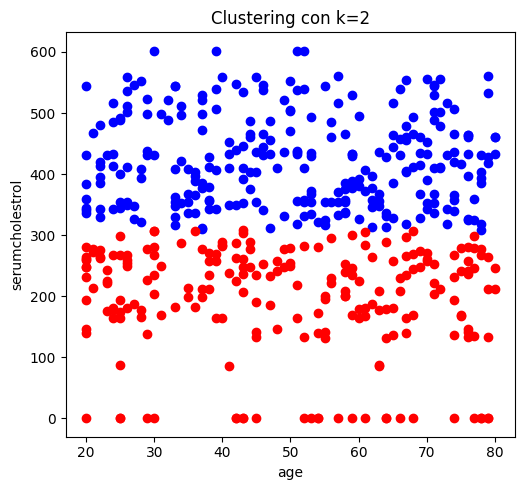

In [11]:
kmeans = KMeans(n_clusters=2, random_state=ran_st)
label = kmeans.fit_predict(X_balanced)

# filter rows of original data
filtered_label0 = X_balanced[label == 0]
filtered_label1 = X_balanced[label == 1]

X_balanced['cluster'] = kmeans.labels_

x_lab = "age"
y_lab = "serumcholestrol"

# Plotting results for k=2
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # Subplot para la primera tabla
plt.scatter(filtered_label0[x_lab], filtered_label0[y_lab], color='blue')
plt.scatter(filtered_label1[x_lab], filtered_label1[y_lab], color='red')
plt.xlabel(x_lab)
plt.ylabel(y_lab)
plt.title("Clustering con k=2")

plt.tight_layout()  # Ajusta la disposición de los subplots para evitar superposiciones
plt.show()


# Evaluating methods with equal gender
## Silhouette Scores and Elbow Method
Evaluating clusters k=2 and k=3




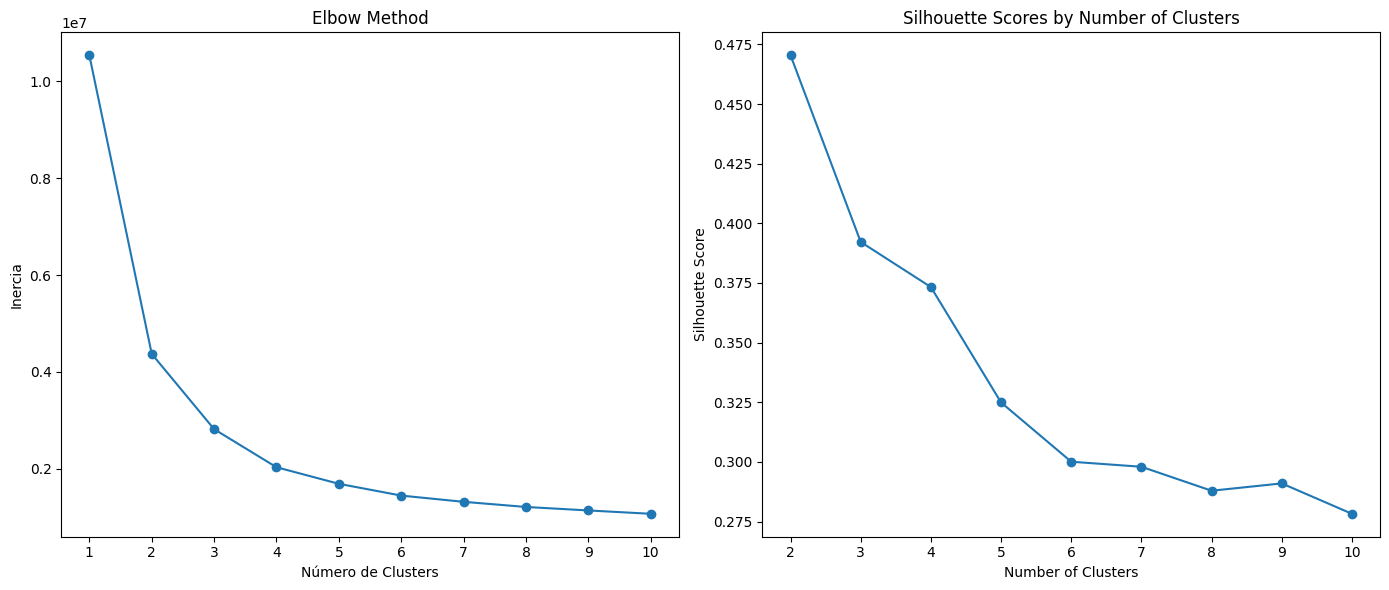

In [12]:
# List to store the inertia values.
inertia = []

# Maximum number of clusters you want to test.
max_clusters = 10
# Determine the range of k values to evaluate
k_values = range(2, 11)

silhouette_scores = []
inertia_scores = []

# Iterate over the number of clusters from 1 to max_clusters.
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=ran_st)
    kmeans.fit(X_balanced)
    inertia.append(kmeans.inertia_)

# Plotting del elbow method to evaluate the clustering labeling
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, max_clusters + 1), inertia, marker='o', linestyle='-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Elbow Method')
plt.xticks(range(1, max_clusters + 1))

# Calculate Silhouette scores and inertia for different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=30)
    labels = kmeans.fit_predict(X_balanced)
    silhouette_scores.append(silhouette_score(X_balanced, labels))
    inertia_scores.append(kmeans.inertia_)

# Plotting the Silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores by Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

# Evaluating method with more important features
As we saw in the last model, the 7 more important features were "Sleep Suration", "Quality of Sleep", "Heart Rate", "Daily Steps", "Systolic BP" and "Age". We are going to us K-means using only that 7 features.

Silhouette Score: 0.28721133052462927


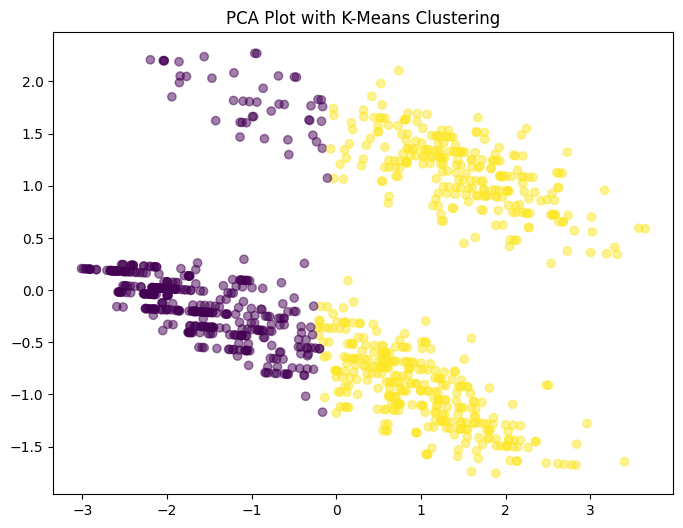

In [14]:
# Dataframe definition
important_features = ["slope", "chestpain", "noofmajorvessels", "restingBP", "restingrelectro", "fastingbloodsugar"]
X = df_cardiovascular[important_features]

# Data normalization
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering con K-Means utilizando las características importantes
kmeans = KMeans(n_clusters=2, random_state=ran_st)
kmeans.fit(X_scaled)

# Clustering evaluation
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print('Silhouette Score:', silhouette_avg)

# PCA visualization.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.title('PCA Plot with K-Means Clustering')
plt.show()


# Conclusion
The defined clusters are reasonably good in terms of quality, but there is still room for improvement. That indicates that it's necessary to relabel the data and consider other types of clustering.